# Условие
 По условию, распределение имеет вид $$U_{[-3\theta, \theta]}(x) = \frac{x+3\theta}{4\theta}$$
 И нам нужно проверить, что параметр $\theta$ можно оценить как $\theta_n = 4x_{[n]} + x_{[1]}$, где индексы - это расположение элементов выборки в вариационном ряду. Т.е. здесь имеем дело с минимумом и максимумом.
 
## Смоделируем и попробуем интерпретировать результаты!


In [60]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [61]:
# Параметр нашего равномерного распределения
theta = 10.0

# Критерий ошибки и максимальная длина выборки соответственно
eps = 20 ** (-1)
N = 10000

In [62]:
# Создаем аналитическую функцию распределения с нашими параметрами
F_x = np.linspace(-3 * theta, theta, 10000)
F_y = [x / (4 * theta) for x in F_x]

In [63]:
P = []
diff_array = []

In [64]:
# Начинаем считать наши вероятности для увеличивающейся выборки
for sample_len in range(100, N + 1):
    theta_exp = []
    for gen in range(1, 50):
        # Для каждой длины выборки берем 48 реализаций С.В. и строим вариационный ряд
        sample = np.random.uniform(-3 * theta, theta, sample_len)
        variation_array = np.sort(sample)
        # И докидываем нашу оценку в массив, чтобы потом найти ее мат ожидание
        theta_exp.append(4 * variation_array[-1] + variation_array[0])
    # Здесь и находим мат ожидание и отнимаем искомый параметр, смотрим на отклонение со знаком
    diff_array.append(np.mean(theta_exp) - theta)

    # Т.к. нужно показать состоятельность, т.е нужно показать сходимость по вероятности, применяем тот же трюк, как и в прошлый раз - считаем вероятность как отношение количества ошибок, которые превышают критерий, ко всему количеству.
    errors = np.abs(np.array(theta_exp) - theta)
    P.append(len(errors[errors >= eps]) / gen)

Text(0.5, 0, 'Length of sample')

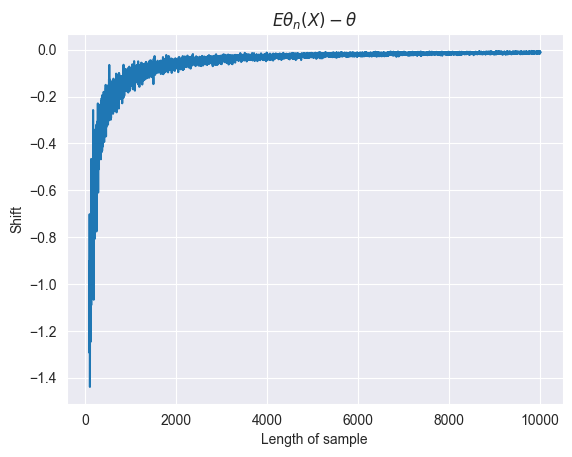

In [65]:
sns.lineplot(x=range(100, N + 1), y=diff_array)
plt.title('$E\\theta_n(X) - \\theta $')
plt.ylabel('Shift')
plt.xlabel('Length of sample')

Text(0.5, 0, 'Length of sample')

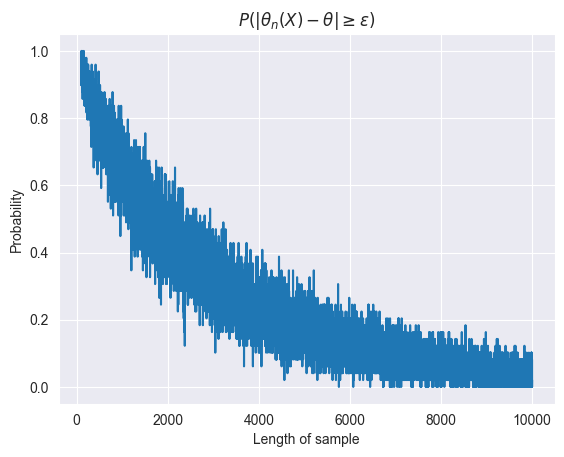

In [66]:
sns.lineplot(x=range(100, N + 1), y=P)
plt.title('$P(|\\theta_n(X) - \\theta| \geq \epsilon)$')
plt.ylabel('Probability')
plt.xlabel('Length of sample')

# Пришло время анализа результатов!

Смотрим на первый график и не понимаем, оценка всё-таки несмещенная в принципе или только асимптотически...
Начинаем считать этот факт аналитически!

Мы знаем, что оценка пишется как $\theta_n = 4x_{[n]} + x_{[1]}$, т.е. если говорить на языке С.В. оценка будет $\theta_n = 4*max(X) + min(X)$. 

Обозначим $\eta = max(X)$, $\xi = min(X)$. Тогда оценка преобразуется еще красивее: $\theta_n = 4\eta + \xi$. Теперь надо найти мат ожидание от этой конструкции, а для этого нужно знать распределения и их плотности... Не беда, считали на паре!
$$F_\eta = (\frac{x+3\theta}{4\theta})^n, \; \rho_\eta = \frac{n}{4\theta} \cdot (\frac{x+3\theta}{4\theta})^{n-1}$$
$$F_\xi = 1 - (\frac{\theta - x}{4\theta})^n, \; \rho_\xi = \frac{n}{4\theta} \cdot (\frac{\theta - x}{4\theta})^{n-1}$$

Понадеемся что мат ожидание суммы будет суммой мат ожиданий (т.к. не факт что мат ожидания тут будут конечны по одиночке), разбиваем его и считаем по отдельности... Только я интегралы полностью перебивать в TeX не буду, напишу просто чему они равны уже в красивой форме!

$$\textbf{E}\eta = \frac{n}{4\theta} \int_{-3\theta}^{\theta} x \cdot (\frac{x+3\theta}{4\theta})^{n-1} dx = ... = \frac{\theta n - 3 \theta}{n+1}$$
$$\textbf{E}\xi = \frac{n}{4\theta} \int_{-3\theta}^{\theta} x \cdot (\frac{\theta - x}{4\theta})^{n-1} dx = ... = \frac{\theta - 3\theta n}{n+1}$$
$$\textbf{E}(4*\eta + \xi) = \frac{\theta n -11\theta}{n+1} \rightarrow_{n\rightarrow \infty} \theta$$



In [67]:
# Проверим ка, насколько хорошо сошлась алгебра и реальность
diff_theory_arr = []

for sample_len in range(100, N + 1):
    theta_exp = []
    for gen in range(1, 50):
        # Для каждой длины выборки берем 48 реализаций С.В. и строим вариационный ряд
        sample = np.random.uniform(-3 * theta, theta, sample_len)
        variation_array = np.sort(sample)
        # И докидываем нашу оценку в массив, чтобы потом найти ее выборочное мат ожидание
        theta_exp.append(4 * variation_array[-1] + variation_array[0])
    # Здесь и находим мат ожидание и отнимаем искомый параметр, смотрим на отклонение со знаком
    diff_theory_arr.append(np.mean(theta_exp) - (theta * sample_len - 11 * theta) / (sample_len + 1))

Text(0.5, 0, 'Length of sample')

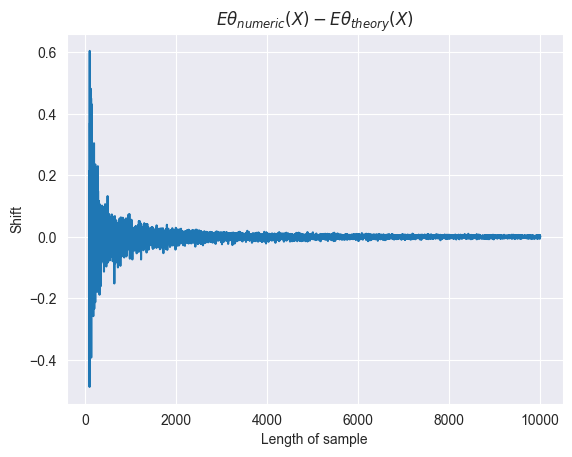

In [68]:
sns.lineplot(x=range(100, N + 1), y=diff_theory_arr)
plt.title('$E\\theta_{numeric}(X) - E\\theta_{theory}(X)$')
plt.ylabel('Shift')
plt.xlabel('Length of sample')

### По моему, всё получилось!
Теперь несколько слов про состоятельность нашей оценки. Тут уже аналитику я не приведу, но по графику однозначно видно, что вероятность стремится к нулю при увеличении выборки. Это говорит нам, что оценка является состоятельной!

Text(0.5, 0, 'Length of sample')

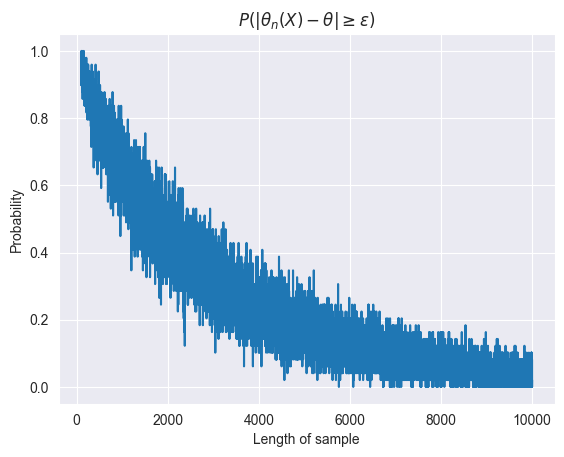

In [69]:
sns.lineplot(x=range(100, N + 1), y=P)
plt.title('$P(|\\theta_n(X) - \\theta| \geq \epsilon)$')
plt.ylabel('Probability')
plt.xlabel('Length of sample')